**Libraries that are necessary on this notebook**

In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

**Reading the data from the txt format (first to last row of column 1 is X and of column 2 is y)**

In [2]:
data = np.loadtxt("data/ex1data1.txt", delimiter=',')
X = data[:,0]
y = data[:,1]

**Seeing the dimensions of the data matrices, and also the training examples**

In [3]:
print(X.shape)
print(y.shape)
print("training examples: ", len(X))

(97,)
(97,)
training examples:  97


**Visualizing the data**

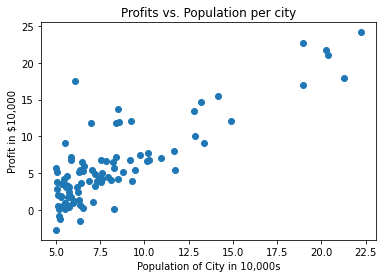

In [4]:
plt.scatter(X, y) 

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

**Defining the cost function for linear regression**

Linear regression is based on linear equation that has this mathematical definition:



As f is a function of x with parameters w and b, in this case x is the *population of the city* and f is the *profit*

The parameters influences in how the model fit to the data, changing values of w influences in the rotation of the curve according to the horizontal axis and changing values of b changes where the model will intercept the vertical axis

Get the best fit of the model match the best values to w and b, to find these we need to minimize the cost functions (which represents the error of the model related to the data)

The cost function has this mathematical format:

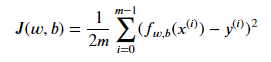

The $f_{w,b}(x^{(i)})$ represents the model prediction and $y^{(i)}$ represents the real data, m is the number of examples in the training set

In [5]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    sum_costs = 0
    for i in range(m):
        #linear function
        f_wb = w*x[i]+ b
        #cost function for linear regression
        cost_i = (f_wb - y[i])**2
        #sum of costs
        sum_costs = sum_costs + cost_i
    total_cost = 1/(2*m)* sum_costs 
    return total_cost

To get the best set of parameters (w,b) there's a algorithm called gradient descent, that updates constantly the values of w and b to match the min cost function.

The algorithm is at follows:

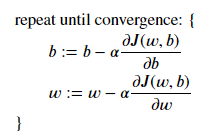

And the definition of the derivatives terms are:

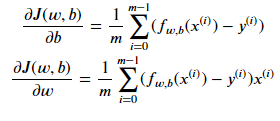

In [6]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    sum_djdw = 0
    sum_djdb = 0
    for i in range(m):
        #compute function value
        f_wb = w*x[i] + b
        #compute derivatives
        dj_dwi = (f_wb - y[i]) * x[i]
        dj_dbi = (f_wb - y[i])
        #compute sum of derivatives
        sum_djdw = sum_djdw + dj_dwi
        sum_djdb = sum_djdb + dj_dbi
    dj_dw = sum_djdw / m
    dj_db = sum_djdb / m 
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 

Setting initial w and b = 0 with an alpha rate of 0.01 and 5000 iterations we have these results for cost function using gradient descent:

In [22]:
initial_w = 0.
initial_b = 0.

iterations = 5000
alpha = 0.01

w,b,_,_ = gradient_descent(X ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  500: Cost     4.71   
Iteration 1000: Cost     4.52   
Iteration 1500: Cost     4.48   
Iteration 2000: Cost     4.48   
Iteration 2500: Cost     4.48   
Iteration 3000: Cost     4.48   
Iteration 3500: Cost     4.48   
Iteration 4000: Cost     4.48   
Iteration 4500: Cost     4.48   
w,b found by gradient descent: 1.1929853860482198 -3.895300510657168


Its notabble that the gradient converges in the iteration 1500 because after that every iteration has the same cost (4.48)

**Fitting the model with the data**

In [23]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

**Plotting the model with the data to visualize the results of linear regression**

Text(0.5, 0, 'Population of City in 10,000s')

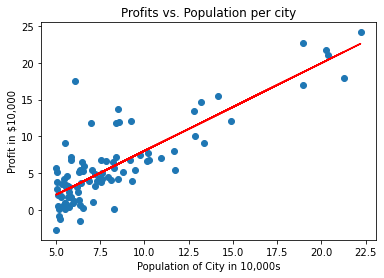

In [24]:
plt.plot(X, predicted, c="r")
plt.scatter(X, y) 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

**Making predictions with the model given some population as input**

In [26]:
predict1 = 5.0 * w + b
print('For population = 50,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 6.5 * w + b
print('For population = 65,000, we predict a profit of $%.2f' % (predict2*10000))

predict3 = 22.5 * w + b
print('For population = 225,000, we predict a profit of $%.2f' % (predict3*10000))


For population = 35,000, we predict a profit of $2801.48
For population = 70,000, we predict a profit of $44555.97
